In [1]:
import random
import ast
import pandas as pd
import numpy as np

df = pd.read_csv('tag_1.csv',encoding='cp949',header=None)
df = df.iloc[400:600]
df.head()

,0,1,2,3,4,5,6
400,401,??중앙동아리 정치경제학연구회 수레바퀴가 신입 연인을 모집합니다,https://www.koreapas.com/bbs/view.php?id=circl...,[],??중앙동아리 정치경제학연구회 수레바퀴가 신입 연인을 모집합니다!\n\r\n?수레바...,중앙동아리 정치경제학연구회 수레바퀴가 신입 연인을 모집합니다중앙동아리 정치경제학연구...,"학회', '경영'"
401,402,[2020 YOUNG TIGERS 신입단원 모집 D-day],https://www.koreapas.com/bbs/view.php?id=circl...,['https://img.koreapas.com/i/de478d7/resize'],[2020 YOUNG TIGERS 신입단원 모집]\n\r\n안녕하십니까 고려대학교 ...,2020 YOUNG TIGERS 신입단원 모집 Dday 2020 YOUNG TIGE...,"운동', '동아리'"
402,403,??[KULSOM D-1] 마감 하루 전!!??????,https://www.koreapas.com/bbs/view.php?id=circl...,['https://img.koreapas.com/i/6f7ae51/resize'],??지원 마감 하루 전입니다! \n\r\n??한 학기 같이 즐거운 추억 만들어요! ...,KULSOM D1 마감 하루 전!! 지원 마감 하루 전입니다! 한 학기 같이 즐...,"학회', '경영'"
403,404,[柔道部] 유도부 상시모집 ??,https://www.koreapas.com/bbs/view.php?id=circl...,"['https://img.koreapas.com/i/5b0b384/resize', ...",??고대 유도부 신입부원 상시모집??\r\n????아무나 와라 강하게 키워줄게???...,유도부 상시모집 고대 유도부 신입부원 상시모집 아무나 와라 강하게 키워줄게 고...,"동아리', '운동'"
404,405,[D-3]??KU-HOPE 2020년 1학기 리크루팅!??,https://www.koreapas.com/bbs/view.php?id=circl...,['https://img.koreapas.com/i/e01d297/resize'],??재난에서 희망으로! 안녕하세요 고려대학교 집수리봉사동아리 KU-HOPE 입니다....,D3KUHOPE 2020년 1학기 리크루팅! 재난에서 희망으로! 안녕하세요 고려대학...,"봉사', '동아리'"


In [8]:
df.columns = ['index', 'title', 'site', 'img', 'description', 'txt', 'tags']

train_data = df.iloc[:160,].reset_index()
test_data = df.iloc[160:,].reset_index()

In [9]:
import numpy as np

train_data['txt'] = train_data['txt'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행, 완성형 한글의 범위
train_data['txt'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
train_data = train_data.dropna(how='any') # Null 값 제거

print('전처리 후 훈련용 샘플의 개수 :',len(train_data))

전처리 후 훈련용 샘플의 개수 : 160


In [10]:
test_data['txt'] = test_data['txt'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행, 완성형 한글의 범위
test_data['txt'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 40


In [11]:
from konlpy.tag import Okt

okt = Okt()
okt.morphs(train_data['txt'][0])

['중앙',
 '동아리',
 '정치',
 '경제학',
 '연구',
 '회',
 '수레바퀴',
 '가',
 '신입',
 '연인',
 '을',
 '모집',
 '합니다',
 '중앙',
 '동아리',
 '정치',
 '경제학',
 '연구',
 '회',
 '수레바퀴',
 '가',
 '신입',
 '연인',
 '을',
 '모집',
 '합니다',
 '수레바퀴',
 '월',
 '오픈',
 '세미나',
 '학회',
 '에',
 '가입',
 '하지',
 '않아도',
 '참여',
 '가능합니다',
 '개',
 '중',
 '원하는',
 '만큼',
 '참여',
 '해주세요',
 '월',
 '일',
 '저녁',
 '시',
 '영화제',
 '낮',
 '에',
 '투표',
 '하고',
 '밤',
 '에',
 '영',
 '화보',
 '자',
 '택배',
 '노동자',
 '의',
 '삶',
 '을',
 '다루는',
 '영화',
 '미안해요',
 '리키',
 '를',
 '함께',
 '보고',
 '이야기',
 '를',
 '나눕니다',
 '월',
 '일',
 '저녁',
 '시',
 '오픈',
 '세미나',
 '기술',
 '이',
 '발전',
 '하면서',
 '나타난',
 '플랫폼',
 '노동',
 '과연',
 '경제',
 '를',
 '되살릴',
 '수',
 '있을까',
 '노동자',
 '의',
 '권리',
 '는',
 '어떻게',
 '보장',
 '받을',
 '수',
 '있는',
 '걸까',
 '월',
 '일',
 '저녁',
 '시',
 '수레바퀴',
 '개강',
 '총회',
 '개강',
 '파티',
 '수레바퀴',
 '사람',
 '들',
 '이',
 '한데',
 '모여',
 '학기',
 '활동',
 '방향',
 '을',
 '공유',
 '하고',
 '친목',
 '을',
 '다집니다',
 '날씨',
 '도',
 '좋고',
 '꽃',
 '도',
 '피었는데',
 '놀',
 '사람',
 '이',
 '없다구요',
 '수레',
 '에선',
 '월달',
 '학회',
 '신입',
 '연인',
 '분들',
 '과',

In [12]:
import ssl
from urllib.request import urlopen
from bs4 import BeautifulSoup

context = ssl._create_unverified_context()
resp = urlopen('https://www.ranks.nl/stopwords/korean',context=context)
dom = BeautifulSoup(resp.read().decode('utf8'),'html.parser')
tds = dom.select('.panel-body > table > tbody > tr > td')

In [13]:
import re

stopwords=[]

for _ in tds:
    stopwords+=re.findall(r'([ \w]+)<br/>',str(_))
    
stopwords.append('만큼')
stopwords.append('만 못하다')
stopwords.append('영')
stopwords.append('의')
stopwords.append('하다')
stopwords.append('가')
stopwords.append('이')
stopwords.append('은')
stopwords.append('좀')
stopwords.append('를')
stopwords.append('들')
stopwords.append('는')
stopwords.append('잘')
stopwords.append('자')
stopwords.append('에')
stopwords.append('와')
stopwords.append('한')
stopwords.append('과')
stopwords.append('도')

In [14]:
X_train = []

for sentence in train_data['txt']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)
    
print(X_train[0])

['중앙', '동아리', '정치', '경제학', '연구', '회', '수레바퀴', '신입', '연인', '모집', '중앙', '동아리', '정치', '경제학', '연구', '회', '수레바퀴', '신입', '연인', '모집', '수레바퀴', '오픈', '세미나', '학회', '가입', '않다', '참여', '가능하다', '개', '중', '원하다', '참여', '해주다', '저녁', '시', '영화제', '낮', '투표', '하고', '밤', '화보', '택배', '노동자', '삶', '다루다', '영화', '미안하다', '리키', '보고', '이야기', '나누다', '저녁', '시', '오픈', '세미나', '기술', '발전', '나타나다', '플랫폼', '노동', '경제', '되살리다', '수', '노동자', '권리', '어떻다', '보장', '받다', '수', '걸다', '저녁', '시', '수레바퀴', '개강', '총회', '개강', '파티', '수레바퀴', '사람', '모이다', '학기', '활동', '방향', '공유', '하고', '친목', '다지다', '날씨', '좋다', '꽃', '피다', '놀', '사람', '없다', '수레', '에선', '월달', '학회', '신입', '연인', '분들', '친목', '다지다', '나들이', '벛꽃', '보기', '중', '짜다', '친목', '도모', '기획', '하고', '앞', '수레', '주목', '해주다', '수레바퀴', '활동', '정기', '모임', '사회', '떠들썩하다', '이슈', '살피', '고', '관점', '쌓다', '나가다', '주요', '간지', '살펴보다', '노동', '여성', '평화', '정치', '다양하다', '의제', '깊이', '공부', '세미나', '진행', '실천', '활동', '실천', '지성', '문화제', '집회', '참석', '거나', '학회', '대학생', '사회', '포럼', '참석', '목소리', '내다', '학기', '활동', '일정', '매주', '수요

In [15]:
X_test = []

for sentence in test_data['txt']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

print(X_test[0])

['고려대학교', '합창단', '신입', '단원', '모집', '합창', '덫', '화음', '올가미', '고려대학교', '합창단', '신', '입단', '원', '모집', '매주', '월금', '오후', '시', '정기', '연습', '학생', '회관', '호', '신입생', '환영', '회', '봄', '소풍', '여름', '합숙', '다양하다', '행사', '모집', '관련', '안내', '모집', '분야', '소프라노', '알토', '테너', '베이스', '반', '주자', '반', '주자', '학번', '만', '지원', '자격', '학기', '활동', '가능하다', '고려대학교', '학부', '재', '휴학생', '대학원생', '지원기', '간', '자정', '지원', '방법', '아래', '구글', '설문지', '링크', '통해', '가입', '신청서', '제출', '후', '단장', '정', '이름', '희망', '파트', '지원', '문자', '보내다', '지원이', '접수', '되다', '확인', '후', '개별', '연락', '통해', '면접', '진행', '면접', '에는', '고려대학교', '교가', '절', '자유', '곡', '곡', '준비', '오시', '면', '되다', '합창단', '홍보', '영상', '페이스북', '유튜브', '메일', '많다', '지원', '부탁드리다']


In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)  # 단어집합 생성, 고유번호 부여

print(tokenizer.word_index)

{'토론': 1, '되다': 2, '활동': 3, '동아리': 4, '지원': 5, '수': 6, '이다': 7, '모집': 8, '고려대학교': 9, '학기': 10, '하고': 11, '진행': 12, '적': 13, '학회': 14, '분': 15, '다양하다': 16, '회원': 17, '시': 18, '않다': 19, '대회': 20, '세션': 21, '면접': 22, '곱다': 23, '도란': 24, '기': 25, '원': 26, '인': 27, '신입': 28, '학번': 29, '서': 30, '정기': 31, '싶다': 32, '회': 33, '매주': 34, '많다': 35, '가능하다': 36, '통해': 37, '일정': 38, '참여': 39, '대학': 40, '없다': 41, '에는': 42, '받다': 43, '사람': 44, '분들': 45, '지': 46, '해주다': 47, '아니다': 48, '중': 49, '봉사': 50, '팀': 51, '예정': 52, '대한': 53, '만': 54, '님': 55, '기간': 56, '문의': 57, '고': 58, '영상': 59, '후': 60, '세미나': 61, '부원': 62, '페이스북': 63, '관심': 64, '들다': 65, '주': 66, '인스타그램': 67, '위': 68, '되어다': 69, '열정': 70, '간': 71, '방법': 72, '신': 73, '분야': 74, '어떻다': 75, '분위기': 76, '코기토': 77, '법': 78, '고려대': 79, '공연': 80, '전': 81, '사이버': 82, '나이': 83, '연합': 84, '모임': 85, '학생': 86, '교류': 87, '현재': 88, '운동': 89, '전공': 90, '가입': 91, '바라다': 92, '보다': 93, '선배': 94, '경험': 95, '타': 96, '준비': 97, '오다': 98, '중앙': 99, '드리다': 100, '이나': 

In [17]:
threshold = 3  # 기준치

total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

for key, value in tokenizer.word_counts.items():  # 단어와 빈도수의 쌍(pair)을 key와 value로
    total_freq = total_freq + value

    if(value < threshold):  # 단어의 등장 빈도수가 threshold보다 작으면
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 3489
등장 빈도가 2번 이하인 희귀 단어의 수: 1305
단어 집합에서 희귀 단어의 비율: 37.40326741186586
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.5549006993587486


In [18]:
vocab_size = total_cnt - rare_cnt + 2

print('단어 집합의 크기 :',vocab_size)  

# 등장 빈도수가 2 이하인 단어들을 제외

단어 집합의 크기 : 2186


txt의 최대 길이 : 907
txt의 평균 길이 : 301.16875


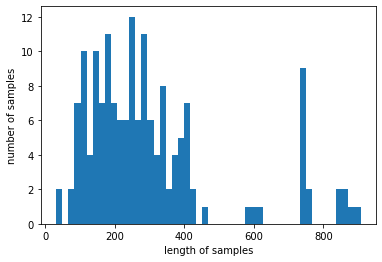

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

print('txt의 최대 길이 :',max(len(l) for l in X_train))
print('txt의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [20]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer = lambda x: x.split(","), binary='true')
y_train = vectorizer.fit_transform(train_data['tags']).toarray()
y_test=vectorizer.transform(test_data['tags']).toarray()

In [29]:
max_len=500
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [30]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(vocab_size, output_dim=256, input_length=500))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(33, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 256)          559616    
_________________________________________________________________
lstm_2 (LSTM)                (None, 500, 128)          197120    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 128)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 33)                2145      
Total params: 808,289
Trainable params: 808,289
Non-trainable params: 0
________________________________________________

In [31]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', call_backs=[es, mc], metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15)

Train on 160 samples
Epoch 1/15
160/160 [==============================] - 9s 54ms/sample - loss: 7.0042 - acc: 0.2125
Epoch 2/15
160/160 [==============================] - 5s 30ms/sample - loss: 6.7409 - acc: 0.4500
Epoch 3/15
160/160 [==============================] - 5s 29ms/sample - loss: 6.3178 - acc: 0.4375
Epoch 4/15
160/160 [==============================] - 5s 30ms/sample - loss: 6.4011 - acc: 0.4938
Epoch 5/15
160/160 [==============================] - 5s 29ms/sample - loss: 6.5175 - acc: 0.4625
Epoch 6/15
160/160 [==============================] - 5s 29ms/sample - loss: 6.5029 - acc: 0.4688
Epoch 7/15
160/160 [==============================] - 5s 30ms/sample - loss: 6.6533 - acc: 0.4437
Epoch 8/15
160/160 [==============================] - 5s 29ms/sample - loss: 6.6885 - acc: 0.4563
Epoch 9/15
160/160 [==============================] - 5s 29ms/sample - loss: 6.8704 - acc: 0.3750
Epoch 10/15
160/160 [==============================] - 5s 30ms/sample - loss: 6.7934 - acc: 0.387

In [120]:
categorytags.replace('[','').replace(']','')

0       [학회, 경영]
1      [운동, 동아리]
2       [학회, 경영]
3      [동아리, 운동]
4      [봉사, 동아리]
         ...    
195    [동아리, 운동]
196    [예술, 동아리]
197     [경영, 학회]
198    [동아리, 예술]
199    [봉사, 동아리]
Length: 200, dtype: object

In [58]:
train_data['txt']

0      중앙동아리 정치경제학연구회 수레바퀴가 신입 연인을 모집합니다중앙동아리 정치경제학연구...
1         신입단원 모집     신입단원 모집  안녕하십니까 고려대학교 응원단 기수부  ...
2        마감 하루 전 지원 마감 하루 전입니다   한 학기 같이 즐거운 추억 만들어요 ...
3       유도부 상시모집  고대 유도부 신입부원 상시모집 아무나 와라 강하게 키워줄게  고...
4       년 학기 리크루팅 재난에서 희망으로 안녕하세요 고려대학교 집수리봉사동아리  입니다...
                             ...                        
155     고려대학교 중앙동아리 관악부에서 신입부원을 모집합니다  관악부 신입부원 모집  고...
156    패션 비즈니스  커뮤니케이션 학회 옷거리   옷거리    안녕하세요 고려대학교 패션...
157       신입단원 모집     신입단원 모집  안녕하십니까 고려대학교 응원단 기수부  ...
158    중앙토론동아리 고란도란에서 기 신입회원을 모집합니다 토론합시다 토론은 고란도란입니다...
159    고려대 최초최다수상 토론스피치 동아리 코기토 신입회원 모집 온라인 면접  안녕하세요...
Name: txt, Length: 160, dtype: object

In [141]:
to_words = []
for index, row in df.iterrows():
    x = df['tags']
    x = x.replace(' ,', ', ')
    split_words = x.split(', ')
    list_in_list = []
    for i in split_words:
        i = str(i)  # 다시 하나의 str으로 만들었다.
        list_in_list.append(i)
    to_words.append(list_in_list)
    
df['tags'] = to_words

AttributeError: 'Series' object has no attribute 'split'